In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data Handling in PyG

### Data

Let's create a dummy graph

In [2]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/torch/csrc/utils/tensor_new.cpp:201.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
edges_attr = np.random.choice(3,500)

In [5]:
ys = torch.rand((100)).round().long()

Convert the graph information into a PyG Data object

In [10]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [11]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

Let's visualize the information contained in the data object

In [12]:
for prop in graph:
    print(prop)

('x', tensor([[0.0273, 0.2085, 0.5545,  ..., 0.0685, 0.3016, 0.1571],
        [0.4249, 0.1254, 0.8788,  ..., 0.4646, 0.4531, 0.5729],
        [0.9948, 0.6852, 0.3260,  ..., 0.5090, 0.3416, 0.6609],
        ...,
        [0.4121, 0.2197, 0.8018,  ..., 0.5130, 0.7328, 0.2873],
        [0.6927, 0.7110, 0.0890,  ..., 0.6711, 0.4184, 0.4410],
        [0.1882, 0.6626, 0.5903,  ..., 0.9665, 0.5449, 0.6394]]))
('edge_index', tensor([[17, 70, 86, 12, 43, 70, 56, 73, 49, 60, 58, 50, 28, 81, 86, 99, 79, 61,
         77,  5,  2, 62, 74,  8, 89, 44, 13, 29, 38, 19, 97, 57, 80, 76, 60, 17,
         87,  2, 50, 38, 19, 79, 89, 21, 80, 16, 67, 73,  1,  6, 44, 16, 44, 91,
         51, 98,  2, 82, 62, 85, 67, 67,  2,  8, 97, 40, 83, 66, 35, 14,  3, 50,
          3, 67,  8, 20, 23, 20, 71, 83, 71, 38, 43, 81, 25, 85, 82, 66, 31, 22,
         88, 90, 96, 56, 67, 94, 33, 59, 83, 89, 65, 56,  8, 23, 70,  3, 10, 37,
         12, 23, 36, 61, 87, 20, 95,  4, 57,  7, 68,  6, 85, 35, 29, 64, 72, 66,
         53, 

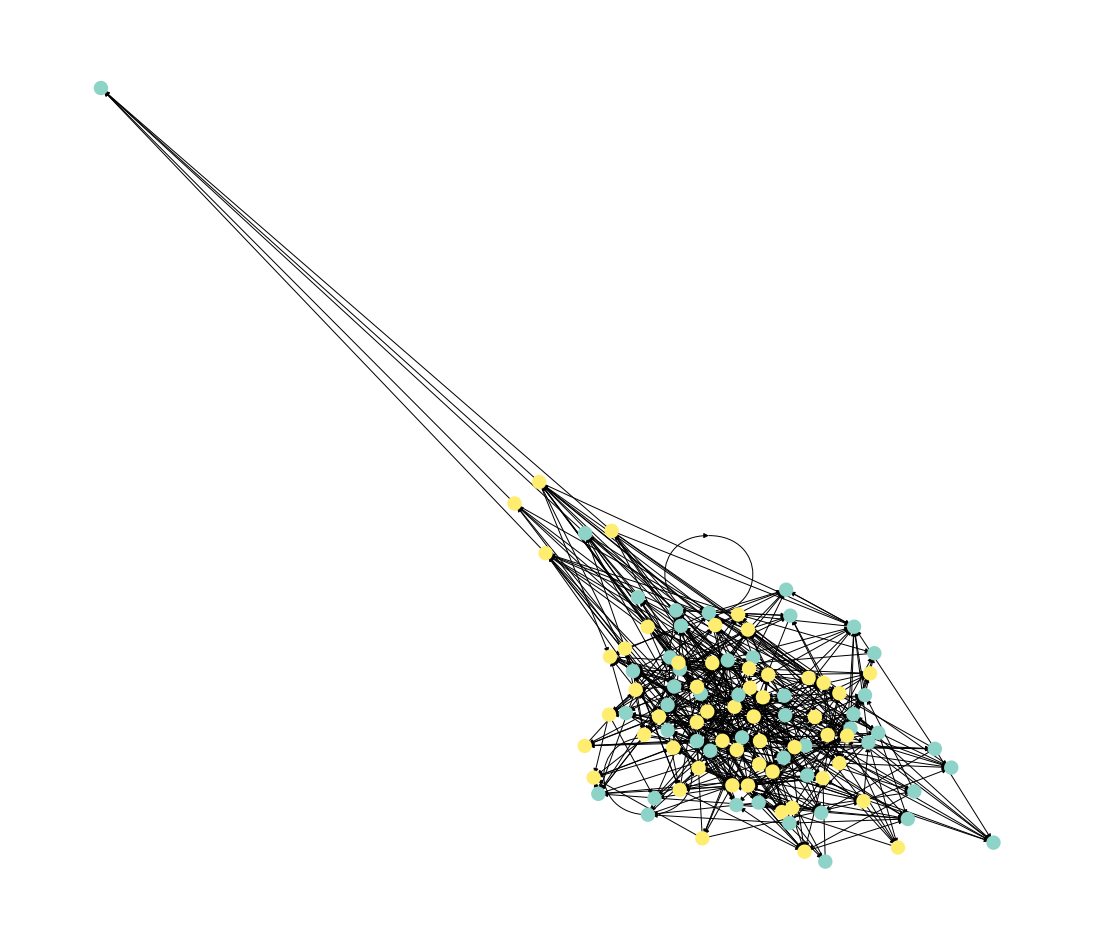

In [13]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [14]:
graph2 = graph

In [15]:
batch = data.Batch().from_data_list([graph, graph2])

In [16]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:
 2


### Cluster

ClusterData groups the nodes of a graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clusters

In [17]:
#cluster = data.ClusterData(graph, 5)

In [18]:
#clusterloader = data.ClusterLoader(cluster)

### Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [19]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                                  shuffle=False)

/opt/conda/lib/python3.7/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [20]:
for s in sampler:
    print(s)
    break

(4, tensor([ 0,  1,  2,  3, 95, 25, 63, 26, 51,  4, 68, 11, 64, 41, 96, 93, 87, 16,
        28, 92, 33, 97, 84, 70, 24, 29, 43, 82, 27, 36, 40, 80, 44, 77, 22, 38,
        74, 81, 65, 19, 69, 34, 62, 57, 15]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,  2, 19, 20,
          1, 13, 21, 22, 23, 24, 25, 26,  1, 27, 27, 28, 29, 30,  3, 31, 32, 14,
         25, 32, 33, 34, 35, 36, 28, 37, 38, 39,  7, 20, 40, 41,  8, 18, 42, 43,
         44],
        [ 0,  0,  1,  1,  1,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,
          6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  9,
          9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12,
         12]]), e_id=tensor([296, 301, 143, 152,  54, 367, 373, 395, 135, 221, 330, 243, 128, 208,
        485, 495, 227, 365, 145, 364,  30, 236, 141, 343, 122, 331, 308,  86,
        228, 445, 139, 443, 408, 466,  25, 234, 370,  52,  18, 155, 379, 412,
        371, 

In [21]:
print("Batch size:", s[0])
print("Number of unique nodes involved in the sampling:",len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

Batch size: 4
Number of unique nodes involved in the sampling: 45
Number of neighbors sampled: 55 9


### Datasets

List all the available datasets

In [22]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'TrackMLParticleTrackingDataset',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'OGB_MAG',
 'DBLP',
 'IMDB',
 'LastFM',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airports']

In [23]:
name = 'Cora'
transform = transforms.Compose([
    transforms.AddTrainValTestMask('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

AttributeError: module 'torch_geometric.transforms' has no attribute 'AddTrainValTestMask'

In [20]:
aids = datasets.TUDataset(root="./data", name="AIDS")

In [21]:
print("AIDS info:")
print('# of graphs:', len(aids))
print('# Classes (graphs)', aids.num_classes)
print('# Edge features', aids.num_edge_features)
print('# Edge labels', aids.num_edge_labels)
print('# Node features', aids.num_node_features)

AIDS info:
# of graphs: 2000
# Classes (graphs) 2
# Edge features 3
# Edge labels 3
# Node features 38


In [22]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

Cora info:
# of graphs: 1
# Classes (nodes) 7
# Edge features 1
# Node features 1433


In [23]:
aids.data

Data(edge_attr=[64780, 3], edge_index=[2, 64780], x=[31385, 38], y=[2000])

In [24]:
aids[0]

Data(edge_attr=[106, 3], edge_index=[2, 106], x=[47, 38], y=[1])

In [25]:
cora.data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [26]:
cora[0]

Data(edge_attr=[10556, 1], edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [28]:
cora_loader = data.DataLoader(cora)

In [29]:
for l in cora_loader:
    print(l)
    break

Batch(batch=[2708], edge_attr=[10556, 1], edge_index=[2, 10556], ptr=[2], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
